In [1]:
!pip install pandas-datareader

In [2]:
import pandas_datareader as pdr

In [3]:
key="33baa3dc787ac2a60aba8fad5de8b7400eec0cba"

In [4]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

<ipython-input-4-4c27bf00e3b2>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pdr.get_data_tiingo('AAPL',api_key=key)


In [5]:
df.to_csv('AAPL.csv')

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('/content/AAPL.csv')


In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-08 00:00:00+00:00,207.25,207.81,204.52,206.05,22525487,49.511754,49.645537,48.859561,49.225076,90101948,0.00,1.0
1,AAPL,2018-08-09 00:00:00+00:00,208.88,209.78,207.20,207.28,23492626,49.901159,50.116168,49.499809,49.518921,93970504,0.00,1.0
2,AAPL,2018-08-10 00:00:00+00:00,207.53,209.10,206.67,207.36,24611202,49.753042,50.129432,49.546866,49.712286,98444808,0.73,1.0
3,AAPL,2018-08-13 00:00:00+00:00,208.87,210.95,207.70,207.70,25890880,50.074292,50.572949,49.793797,49.793797,103563520,0.00,1.0
4,AAPL,2018-08-14 00:00:00+00:00,209.75,210.56,208.26,210.16,20748010,50.285262,50.479451,49.928051,50.383555,82992040,0.00,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-07-31 00:00:00+00:00,196.450,196.49,195.2600,196.060,38824113,196.450,196.49,195.2600,196.060,38824113,0.0,1.0
1252,AAPL,2023-08-01 00:00:00+00:00,195.605,196.73,195.2800,196.235,35281426,195.605,196.73,195.2800,196.235,35281426,0.0,1.0
1253,AAPL,2023-08-02 00:00:00+00:00,192.580,195.18,191.8507,195.040,50389327,192.580,195.18,191.8507,195.040,50389327,0.0,1.0
1254,AAPL,2023-08-03 00:00:00+00:00,191.170,192.37,190.6900,191.570,62243282,191.170,192.37,190.6900,191.570,62243282,0.0,1.0
1255,AAPL,2023-08-04 00:00:00+00:00,181.990,187.38,181.9200,185.520,115956841,181.990,187.38,181.9200,185.520,115956841,0.0,1.0


In [10]:
df2=df.reset_index()['close']

In [11]:
df2.shape

(1256,)

In [12]:
df2

0       207.250
1       208.880
2       207.530
3       208.870
4       209.750
         ...   
1251    196.450
1252    195.605
1253    192.580
1254    191.170
1255    181.990
Name: close, Length: 1256, dtype: float64

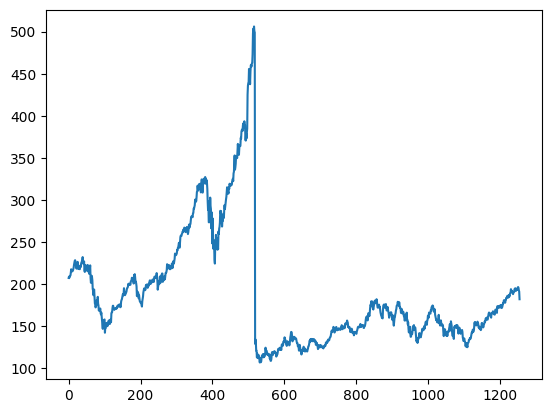

In [13]:
plt.plot(df2)

In [14]:
df2

0       207.250
1       208.880
2       207.530
3       208.870
4       209.750
         ...   
1251    196.450
1252    195.605
1253    192.580
1254    191.170
1255    181.990
Name: close, Length: 1256, dtype: float64

In [15]:
#LSTM are very sensitive to the scale of data,so we apply MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [16]:
df2.shape

(1256, 1)

In [17]:
df2

array([[0.25149656],
       [0.25557921],
       [0.25219787],
       ...,
       [0.21475266],
       [0.21122104],
       [0.18822793]])

In [18]:
#splitting dataset into train data and test data
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [19]:
training_size,test_size

(816, 440)

In [20]:
len(train_data),len(test_data)

(816, 440)

In [24]:
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]    #i=0,1,2,3...99    100
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [25]:
#reshape into x=t,t+1,t+2,t+3 and y=t+4   for time_step=4
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [26]:
X_train

array([[0.25149656, 0.25557921, 0.25219787, ..., 0.12350657, 0.12370695,
        0.12748904],
       [0.25557921, 0.25219787, 0.25555416, ..., 0.12370695, 0.12748904,
        0.12793989],
       [0.25219787, 0.25555416, 0.2577583 , ..., 0.12748904, 0.12793989,
        0.08854101],
       ...,
       [0.04984346, 0.05082029, 0.0482655 , ..., 0.10469631, 0.1063995 ,
        0.10522229],
       [0.05082029, 0.0482655 , 0.05137132, ..., 0.1063995 , 0.10522229,
        0.11453976],
       [0.0482655 , 0.05137132, 0.05921102, ..., 0.10522229, 0.11453976,
        0.10760175]])

In [27]:
X_train.shape,y_train.shape

((715, 100), (715,))

In [28]:
X_test.shape,y_test.shape

((339, 100), (339,))

In [29]:
#reshape input to be [samples,time_steps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [30]:
#create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 115ms/step - loss: 0.0515 - val_loss: 0.0048
Epoch 2/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0139 - val_loss: 0.0022
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0123 - val_loss: 9.4532e-04
Epoch 4/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0108 - val_loss: 4.6129e-04
Epoch 5/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0108 - val_loss: 0.0039
Epoch 6/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0088 - val_loss: 4.7687e-04
Epoch 7/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0074 - val_loss: 4.8385e-04
Epoch 8/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0065 - val_loss: 4.2750e-04
Epoch 9/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0063 - val_loss: 3.4344e-04
Epoch 10/100
12/12 [==============================] - 0s 19ms/step - loss:

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 6ms/step


In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.16448312743475

In [38]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

156.44621439125143

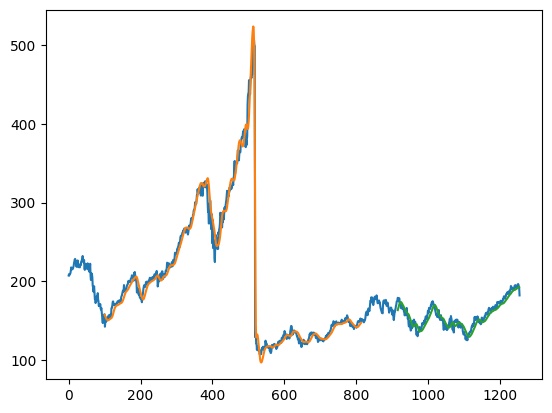

In [42]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [43]:
len(test_data)

440

In [48]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
temp_input

[0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197

In [51]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())sss
        i=i+1


print(lst_output)

[0.2140722]
101
1 day input [0.11559173 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446
 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074
 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419
 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504
 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731
 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185
 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369
 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634
 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567
 0.183469   0.18562304 0.18219161 0.18126487 0.17778334 0.18467126
 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669
 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143
 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405
 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879
 0.21828428 0.21763306 0.2210645  

In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [56]:
len(df2)

1256

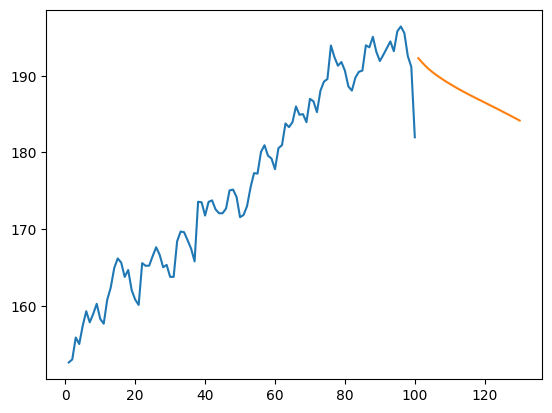

In [57]:
plt.plot(day_new,scaler.inverse_transform(df2[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))